In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [27]:
df = pd.read_csv("municipality_bus_utilization.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [28]:
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


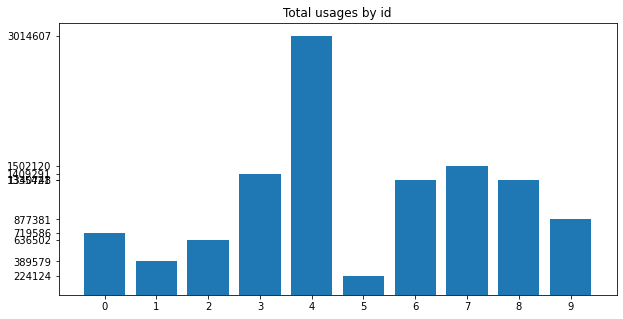

In [29]:
dfSumById = df.groupby(['municipality_id']).sum()['usage']
plt.figure(figsize=(10,5))
plt.xticks(dfSumById.index)
plt.yticks(dfSumById.values)
plt.title("Total usages by id")
plt.bar(x= dfSumById.index, height= dfSumById.values)
plt.show()

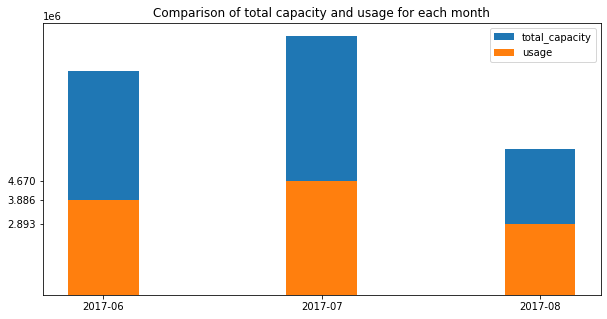

In [30]:
dfGruopByMonth = df.groupby(pd.Grouper(key='timestamp',freq='M')).sum()
plt.figure(figsize=(10,5))
plt.xticks(dfGruopByMonth.index)
plt.yticks(dfGruopByMonth.usage)
dtFmt = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.bar(x= dfGruopByMonth.index, height= dfGruopByMonth.total_capacity, width=10, label = 'total_capacity')
plt.bar(x= dfGruopByMonth.index, height= dfGruopByMonth.usage, width=10, label='usage')
plt.title("Comparison of total capacity and usage for each month")
plt.legend()
plt.show()

In [31]:
dfGruopByDays = df.groupby([pd.Grouper(key='timestamp',freq='D'), 'municipality_id']).mean()
dfGruopByDays.head(10)

usage  total_capacity
timestamp  municipality_id                             
2017-06-04 0                 496.111111          2813.0
           1                 277.888889           397.0
           2                 537.333333           697.0
           3                1257.166667          1930.0
           4                2749.111111          3893.0
           5                 191.055556           587.0
           6                1094.111111          3113.0
           7                1241.000000          2019.0
           8                1177.833333          2947.0
           9                 712.666667          1332.0

### Finding missing dates

In [32]:
missingdates = pd.date_range(start=dfGruopByDays.index.get_level_values(0)[0], end=dfGruopByDays.index.get_level_values(0)[-1]).difference(dfGruopByDays.unstack().index)
missingdates

DatetimeIndex(['2017-06-20', '2017-06-21', '2017-07-31', '2017-08-03',
               '2017-08-04'],
              dtype='datetime64[ns]', freq=None)

In [33]:
dfGruopByDays = dfGruopByDays.unstack().resample('D').mean()

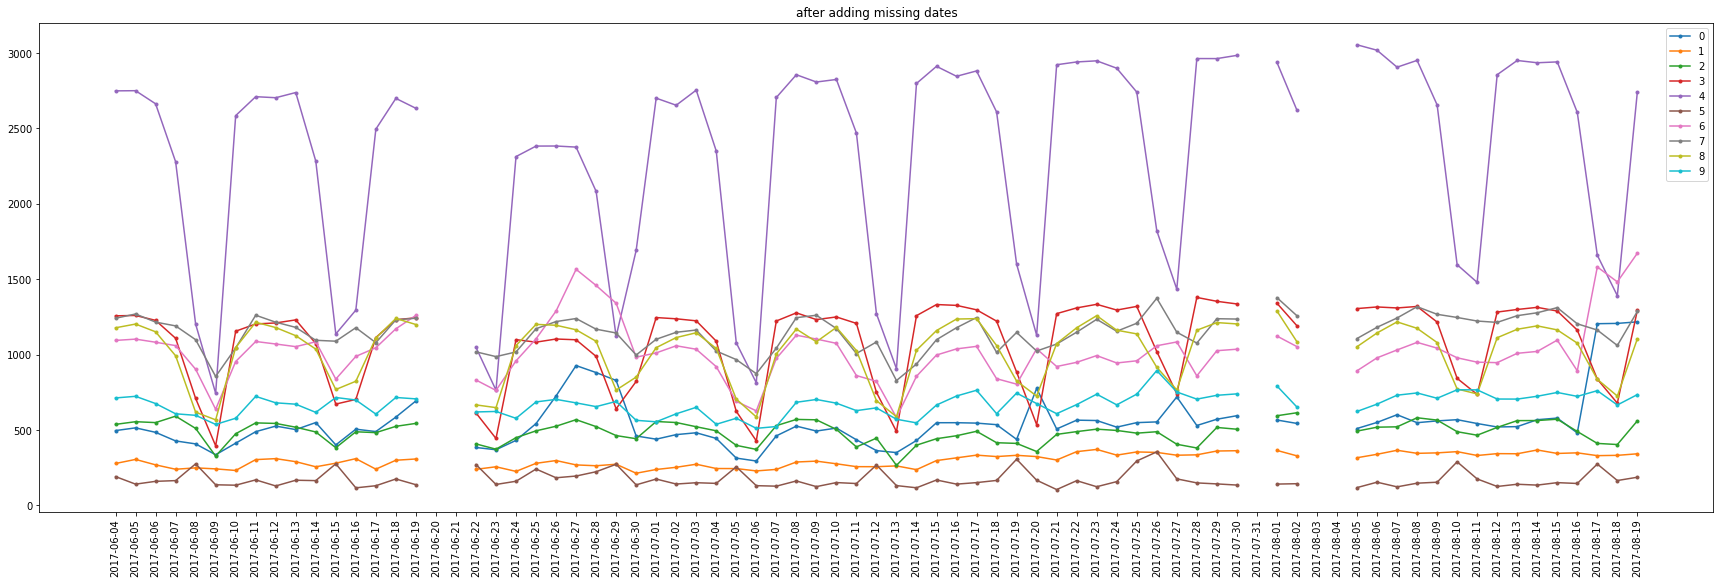

In [9]:
plt.figure(figsize=(30,9))
plt.xticks(dfGruopByDays.index.get_level_values(0), rotation = 90)
dtFmt = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.plot(dfGruopByDays['usage'], marker ='.')
plt.legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.title("after adding missing dates")
plt.show()

### Filling missing date

In [10]:
dfGruopByDays = dfGruopByDays.interpolate()

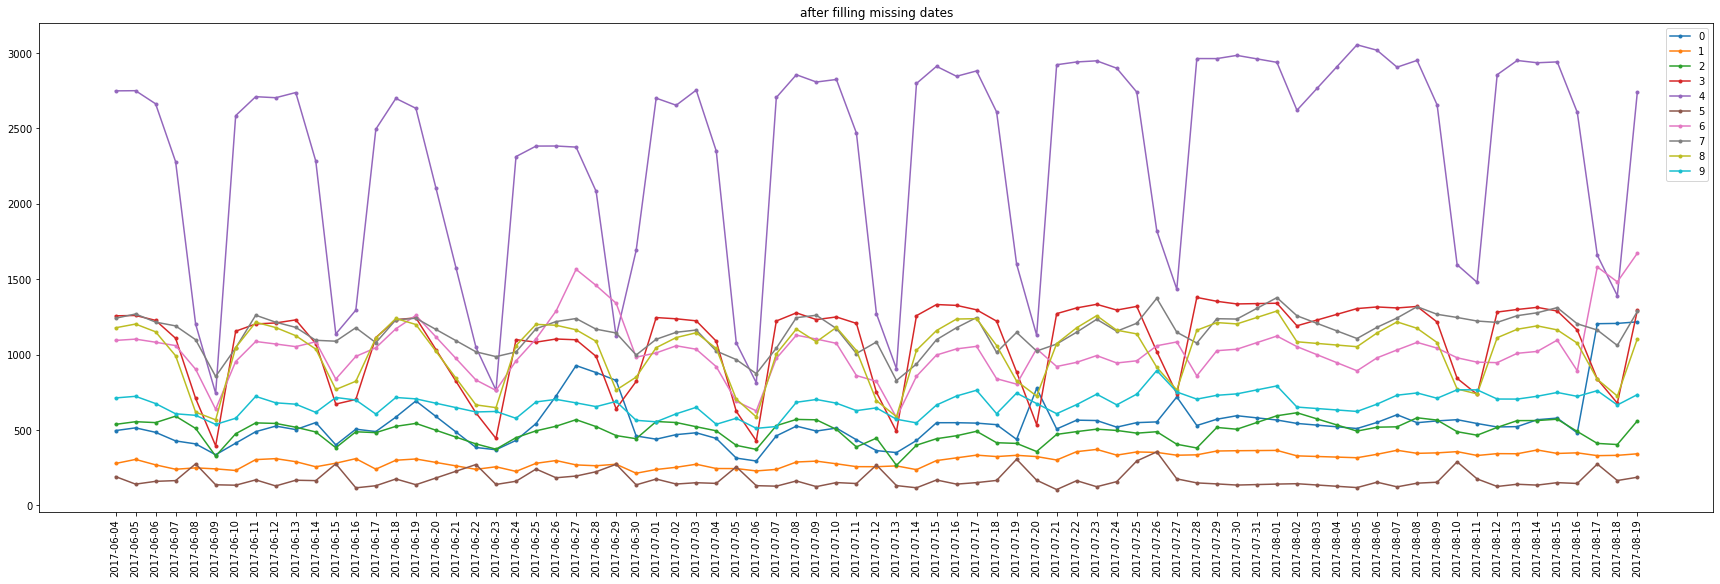

In [11]:
plt.figure(figsize=(30,9))
plt.xticks(dfGruopByDays.index.get_level_values(0), rotation = 90)
dtFmt = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.plot(dfGruopByDays['usage'], marker ='.')
plt.legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.title("after filling missing dates")
plt.show()

### Finding and filling missing hours

In [12]:
dfGruopByHour = df.groupby([pd.Grouper(key='timestamp',freq='H'), 'municipality_id']).max()
dfGruopByHour.head(10)

usage  total_capacity
timestamp           municipality_id                       
2017-06-04 07:00:00 0                  204            2813
                    1                  129             397
                    2                  273             697
                    3                  623            1930
                    4                 1090            3893
                    5                   70             587
                    6                  597            3113
                    7                  718            2019
                    8                  556            2947
                    9                  454            1332

In [13]:
missinghours = pd.date_range(start=dfGruopByHour.index.get_level_values(0)[0], end=dfGruopByHour.index.get_level_values(0)[-1]).difference(dfGruopByHour.unstack().index)
missinghours

DatetimeIndex(['2017-06-07 07:00:00', '2017-06-09 07:00:00',
               '2017-06-10 07:00:00', '2017-06-11 07:00:00',
               '2017-06-12 07:00:00', '2017-06-14 07:00:00',
               '2017-06-15 07:00:00', '2017-06-16 07:00:00',
               '2017-06-17 07:00:00', '2017-06-18 07:00:00',
               '2017-06-19 07:00:00', '2017-06-20 07:00:00',
               '2017-06-21 07:00:00', '2017-06-25 07:00:00',
               '2017-06-28 07:00:00', '2017-07-01 07:00:00',
               '2017-07-03 07:00:00', '2017-07-04 07:00:00',
               '2017-07-05 07:00:00', '2017-07-06 07:00:00',
               '2017-07-07 07:00:00', '2017-07-09 07:00:00',
               '2017-07-10 07:00:00', '2017-07-11 07:00:00',
               '2017-07-12 07:00:00', '2017-07-13 07:00:00',
               '2017-07-14 07:00:00', '2017-07-16 07:00:00',
               '2017-07-17 07:00:00', '2017-07-18 07:00:00',
               '2017-07-20 07:00:00', '2017-07-21 07:00:00',
               '2017-07-

In [14]:
dfGruopByHour = dfGruopByHour.unstack().resample('H')

In [15]:
dfGruopByHour = dfGruopByHour.interpolate()

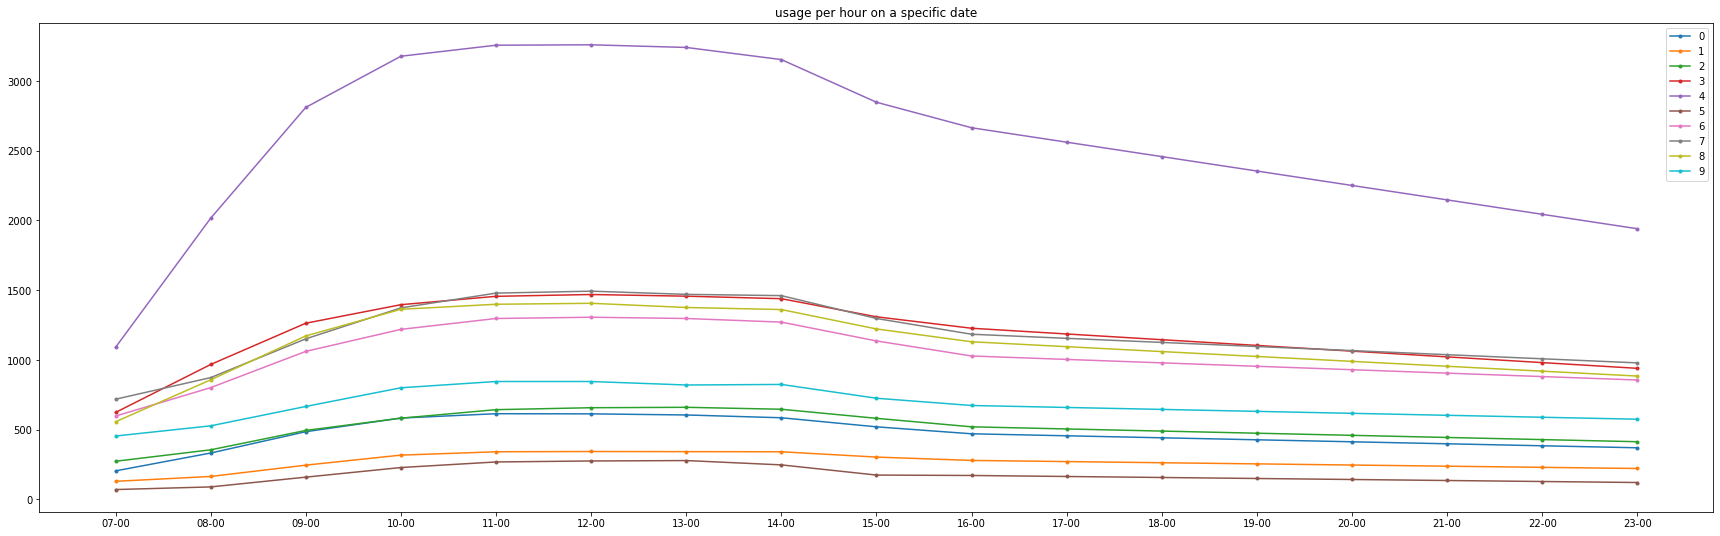

In [16]:
_date = '2017-06-04'
plt.figure(figsize=(30,9))
plt.plot(dfGruopByHour.loc[_date]['usage'], marker ='.')
plt.xticks(dfGruopByHour.loc[_date].index)
dtFmt = DateFormatter("%H-%M")
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.title("usage per hour on a specific date")
plt.show()

----
----

In [17]:
# for municipality_id == 0 
dataset = dfGruopByHour.T.iloc[0].to_frame()

In [18]:
qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')
dataset['qt'] = qt.fit_transform(dataset["usage"])

kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
dataset['kbd'] = kbd.fit_transform(dataset["usage"])

pca = PCA();
dataset['pca'] = pca.fit_transform(dataset["usage"])

In [19]:
dataset["diff_h2h"] = dataset["usage"].diff()

dataset['18_ewm'] = dataset['usage'].ewm(span = 18).mean()
dataset['96_ewm'] = dataset['usage'].ewm(span = 96).mean()

dataset["18_sma"] = dataset["usage"].rolling(18).mean()
dataset["18_std"] = dataset["usage"].rolling(18).std()

In [20]:
train = dataset.loc[:'2017-08-04']
test = dataset.loc['2017-08-05':'2017-08-19']

In [21]:
y_train = train["usage"].values.reshape(-1,1)
X_train = train.drop(columns=["usage"])

In [22]:
y_test = test['usage'].values.reshape(-1,1)
X_test = test.drop(columns=["usage"])

In [23]:
X_train = X_train[18:]
y_train = y_train[18:]

R2 score 0.9999993577305765
MSE score 0.05232112645577575


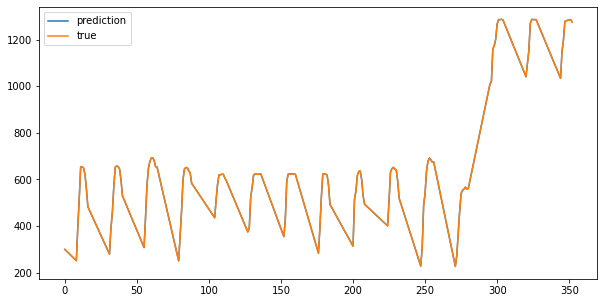

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

y_pred = np.round(y_pred)
print("R2 score", r2_score(y_test, y_pred))
print("MSE score", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["prediction", "true"])
plt.show()

R2 score 0.013245558221280374
MSE score 80383.87324888849


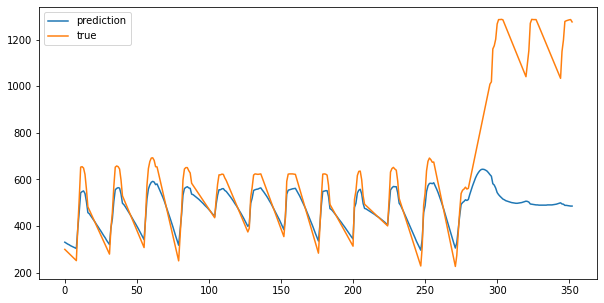

In [25]:
from sklearn import svm

svm_model = svm.SVR()
svm_model.fit(X_train, y_train.ravel())
y_pred = svm_model.predict(X_test)

y_pred = np.round(y_pred)
print("R2 score", r2_score(y_test, y_pred))
print("MSE score", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["prediction", "true"])
plt.show()